In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
worksheet = gc.open('FDataset').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])

In [ ]:
df.head(10)

,X,Y
0,10,35
1,20,65
2,30,95
3,40,125
4,50,155
5,60,185
6,70,215
7,80,245
8,90,275


In [ ]:
df.dtypes

X    object
Y    object
dtype: object

In [ ]:
df = df.astype({'X':'float'})
df = df.astype({'Y':'float'})

In [ ]:
df.dtypes

X    float64
Y    float64
dtype: object

In [ ]:
X=df[['X']].values

In [ ]:
X

array([[10.],
       [20.],
       [30.],
       [40.],
       [50.],
       [60.],
       [70.],
       [80.],
       [90.]])

In [ ]:
Y=df[['Y']].values

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=50)

In [ ]:
X_train

array([[30.],
       [20.],
       [60.],
       [40.],
       [90.],
       [10.]])

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_train_scaled

array([[0.25 ],
       [0.125],
       [0.625],
       [0.375],
       [1.   ],
       [0.   ]])

In [ ]:
AI_brain=Sequential([
    Dense(2,activation='relu'),
    Dense(1,activation='relu')
])

In [ ]:
AI_brain.compile(optimizer='rmsprop',loss='mse')

In [ ]:
AI_brain.fit(x=X_train_scaled,y=Y_train,epochs=20000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 2.6335e-04
Epoch 17502/20000
1/1 [==============================] - 0s 17ms/step - loss: 2.6330e-04
Epoch 17503/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.6335e-04
Epoch 17504/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.6330e-04
Epoch 17505/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6335e-04
Epoch 17506/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.6330e-04
Epoch 17507/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.6335e-04
Epoch 17508/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.6330e-04
Epoch 17509/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.6335e-04
Epoch 17510/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.6330e-04
Epoch 17511/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.6335

In [ ]:
loss_df = pd.DataFrame(AI_brain.history.history)

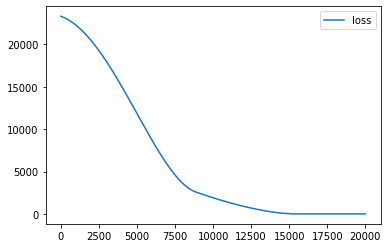

In [ ]:
loss_df.plot()

In [ ]:
X_test

array([[50.],
       [70.],
       [80.]])

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled

array([[0.5  ],
       [0.75 ],
       [0.875]])

In [ ]:
AI_brain.evaluate(X_test_scaled,Y_test)

1/1 [==============================] - 0s 238ms/step - loss: 4.1457e-04


0.0004145721031818539

In [ ]:
input=[[609]]

In [ ]:
input_scaled = scaler.transform(input)

In [ ]:
input_scaled.shape

(1, 1)

In [ ]:
input_scaled

array([[7.4875]])

In [ ]:
AI_brain.predict(input_scaled)

array([[1831.8749]], dtype=float32)